# Implementing DBSCAN Clustering in Python

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

#### Creating data points in the form of a circle

In [3]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal
             (-30,30)) for x in range(1,n+1)]

df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

In [4]:
df

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181
...,...,...
295,-229.000000,-504.000000
296,392.000000,-580.000000
297,134.000000,525.000000
298,469.000000,-535.000000


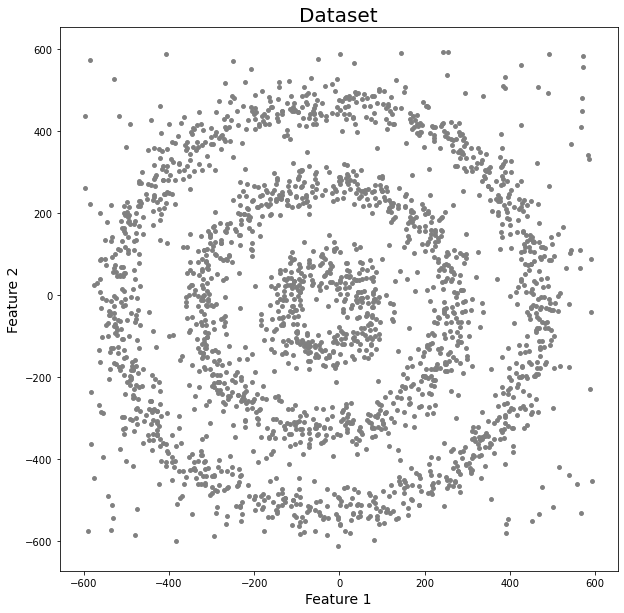

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# K-Means vs. DBSCAN Clustering

In [6]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

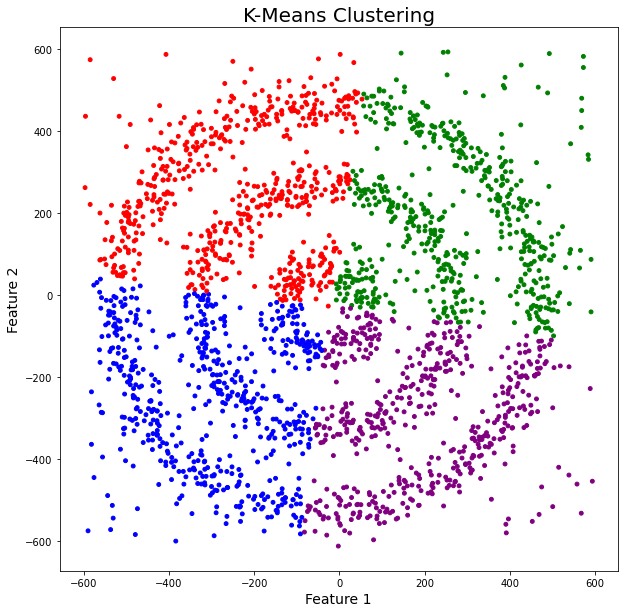

In [7]:
df['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [8]:
# Here, K-means failed to cluster the data points into four clusters. Also, it didn’t work well with noise. 
# Therefore, it is time to try another popular clustering algorithm

# DBSCAN Clustering

In [9]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN()

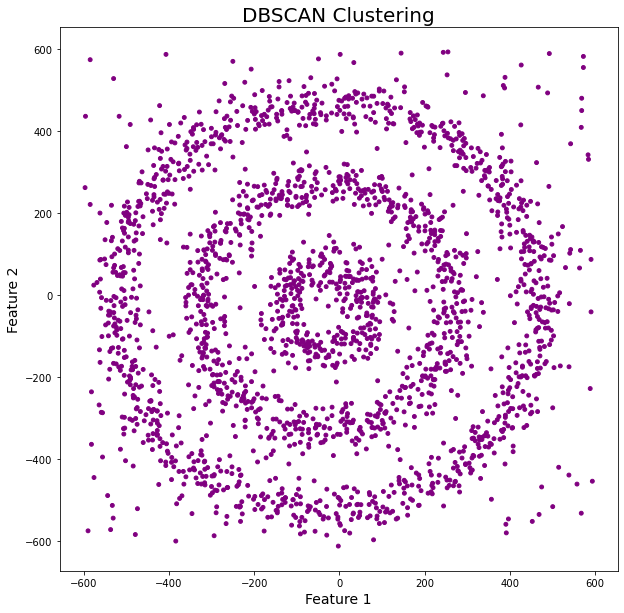

In [10]:
df['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [11]:
# Let’s plot our K-distance graph and find the value of epsilon. Use the following syntax:

# Plotting K-distance Graph vs epsilon
#distances = np.sort(distances, axis=0)
#distances = distances[:,1]
#plt.figure(figsize=(20,10))
#plt.plot(distances)
#plt.title('K-distance Graph',fontsize=20)
#plt.xlabel('Data Points sorted by distance',fontsize=14)
#plt.ylabel('Epsilon',fontsize=14)
#plt.show()

In [12]:
# The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 30 in this case. 
# Now, it’s time to find the value of minPoints. The value of minPoints also depends on domain knowledge. 
# This time I am taking minPoints as 6:

In [22]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=40,min_samples=10)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=40, min_samples=10)

In [23]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    1081
 1     754
 2     326
-1     139
Name: DBSCAN_opt_labels, dtype: int64

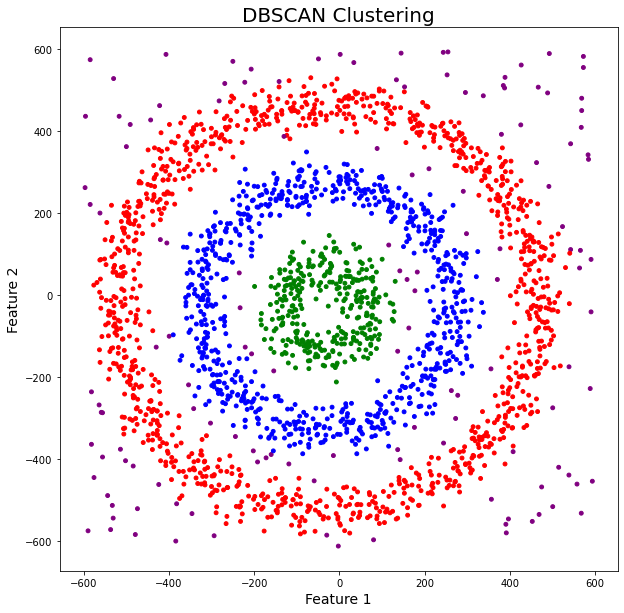

In [24]:
#The most amazing thing about DBSCAN is that it separates noise from the dataset pretty well. 
# Here, 0, 1 and 2 are the three different clusters, and -1 is the noise. Let’s plot the results and see what we get.

# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [15]:
# Note that there also exists a much better and recent version of this algorithm known as HDBSCAN which uses
# Hierarchical Clustering combined with regular DBSCAN. It is much faster and accurate than DBSCAN.
# HDBSCAN = DBSCAN + Hierarchical

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# importing plotting library 
import matplotlib.pyplot as plt
# Create Sample data
from sklearn.datasets import make_moons
X, y= make_moons(n_samples=500, shuffle=True, noise=0.1, random_state=20)

In [2]:
X, y

(array([[ 1.62938083e-01, -4.22641432e-02],
        [ 2.53290613e-01,  8.64820007e-01],
        [-4.49177469e-01,  1.05496422e+00],
        [ 2.08095840e+00,  1.89037617e-01],
        [ 1.13982740e+00, -3.66592549e-01],
        [ 9.53248937e-01,  2.56120670e-01],
        [ 1.92578701e+00,  6.49128930e-01],
        [-1.05772300e+00,  1.90378128e-01],
        [ 8.96615527e-01,  2.53837202e-01],
        [ 1.29273789e+00, -3.69516523e-01],
        [ 1.97057867e+00,  3.20311944e-01],
        [-1.01356617e+00,  1.15034998e-01],
        [ 1.93133608e+00,  1.77039500e-01],
        [ 7.21947546e-01,  6.51498348e-01],
        [ 5.65082969e-01, -3.99178570e-01],
        [-6.90775960e-01,  7.70427848e-01],
        [ 2.48995375e-01, -1.96782729e-01],
        [ 3.22273524e-01,  1.11753514e+00],
        [ 1.66269829e+00, -2.26613538e-01],
        [ 9.29332605e-01,  2.00625226e-01],
        [ 9.45247416e-01,  3.66299313e-01],
        [ 1.13362337e+00, -3.02310400e-01],
        [-8.24166001e-01,  3.589

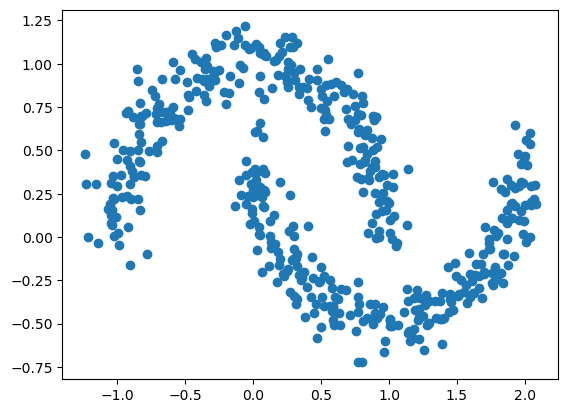

In [3]:
plt.scatter(x= X[:,0], y= X[:,1])

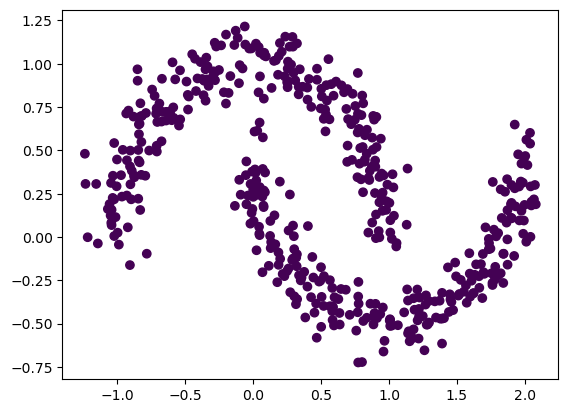

In [8]:
# DBSCAN Clustering
db = DBSCAN(eps=0.55, min_samples=3)

# Plotting the clusters
plt.scatter(x= X[:,0], y= X[:,1], c=db.fit_predict(X))